In [33]:
# Import Dependencies
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, classification_report
import matplotlib.pyplot as plt

## HR Employee Attrition
Keywords: multivariate, classification.

## Description
This dataset is used to evaluae what features lead to employee attrition. This is a fictional data set that was created by IBM data scientists to reflect real world data.

## Source
https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [2]:
# Read the csv file into a pandas DataFrame
df = pd.read_csv('../Resources/HREmployeeAttrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,7,...,4,80,1,6,3,3,2,2,2,2


In [4]:
# Select our independent X variables, and our dependent y variable. 
X = df.drop(columns='Attrition')
y = df['Attrition']

In [5]:
# Confirm imblance of target variable 'Attrition'
# 1 = Attrition; 0 = No Attrition
y.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

### Imbalanced

In [7]:
# Create Validation training and testing datasets without balancing.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [54]:
# Confirm imblance of target variable 'Attrition' in the test dataset
# 1 = Attrition; 0 = No Attrition
y_test.value_counts()

0    370
1     71
Name: Attrition, dtype: int64

In [10]:
# Create a Linear Regression model object
log = LogisticRegression(solver='liblinear')

In [11]:
# Train the model using the training datasets
log.fit(X_train,y_train)

LogisticRegression(solver='liblinear')

In [13]:
# Make predictions using the testing dataset
y_pred = log.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

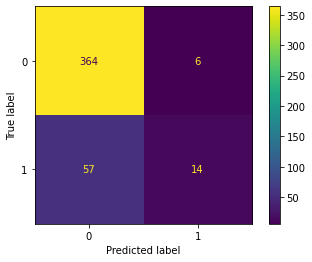

In [29]:
# Plot the Confusion Matrix values
plot_confusion_matrix(log,X_test,y_test)

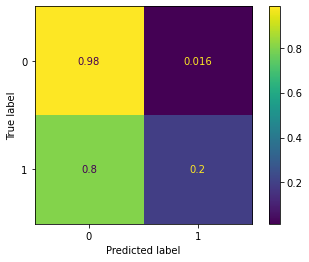

In [32]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(log,X_test,y_test,normalize='true')

In [34]:
# Print classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       370
           1       0.70      0.20      0.31        71

    accuracy                           0.86       441
   macro avg       0.78      0.59      0.61       441
weighted avg       0.84      0.86      0.82       441



### Balanced

In [56]:
# Create our Validation training and testing datasets with balancing.
balanced_df = pd.concat([df[df['Attrition']==0].sample(237),df[df['Attrition']==1]])
X_bal = balanced_df.drop(columns='Attrition')
y_bal = balanced_df['Attrition']
# X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X,y, test_size=0.3,stratify=y)
X_train_bal, X_test_bal, y_train_bal, y_test_bal = train_test_split(X_bal,y_bal, test_size=0.3,stratify=y_bal)

In [57]:
# Confirm imblance of target variable 'Attrition' in our stratified dataset
# 1 = Attrition; 0 = No Attrition
y_train_bal.value_counts()

0    166
1    165
Name: Attrition, dtype: int64

In [58]:
# Create the Linear Regression model object
log_bal = LogisticRegression(solver='liblinear')

In [59]:
# Train the model using the training sets
log_bal.fit(X_train_bal,y_train_bal)

LogisticRegression(solver='liblinear')

In [63]:
# Make predictions using the testing dataset
y_pred_bal = log_bal.predict(X_test_bal)
y_pred_bal

array([0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1], dtype=int64)

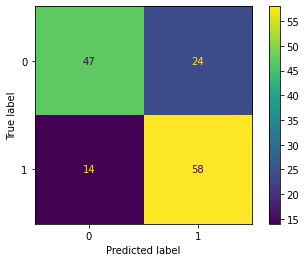

In [64]:
# Plot the Confusion Matrix values
plot_confusion_matrix(log_bal,X_test_bal,y_test_bal)

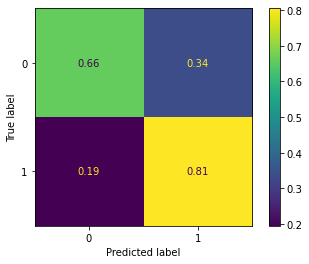

In [65]:
# Plot the Confusion Matrix prediction percentages
plot_confusion_matrix(log_bal,X_test_bal,y_test_bal, normalize='true')

In [66]:
# Print classification report
print(classification_report(y_test_bal,y_pred_bal))

              precision    recall  f1-score   support

           0       0.77      0.66      0.71        71
           1       0.71      0.81      0.75        72

    accuracy                           0.73       143
   macro avg       0.74      0.73      0.73       143
weighted avg       0.74      0.73      0.73       143

